In [236]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import IterativeImputer
import missingno as msno #The missingno library is used for visualizing missing data in a dataset. It provides a variety of plots to help you understand the distribution and patterns of missing values, which can be crucial for data cleaning and preprocessing.

In [237]:
# Script for github 
import nbformat

# Load the notebook
with open('aud4-data_preparation.ipynb', 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Add execution_count to each code cell if missing
for cell in notebook.cells:
    if cell.cell_type == 'code' and 'execution_count' not in cell:
        cell['execution_count'] = None

# Save the notebook
with open('aud4-data_preparation.ipynb', 'w', encoding='utf-8') as f:
    nbformat.write(notebook, f)

1. Discovering Missing values

In [238]:
data = pd.read_csv('spaceship_titanic.csv')

In [239]:
data.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
96,0103_02,Earth,True,NaN,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
97,0103_03,Earth,True,NaN,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False
98,0105_01,Earth,NaN,NaN,TRAPPIST-1e,NaN,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [241]:
data.isnull().sum() # missing values

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [242]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7699.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.798805,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.557353,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [243]:
missing_values_percent = data.isnull().sum() / len(data) * 100 # kolku procenti imam missing values
missing_values_percent

PassengerId      0.000000
HomePlanet       4.612907
CryoSleep        2.496261
Cabin           78.235362
Destination      2.093639
Age             11.434488
VIP              2.335212
RoomService      2.082135
FoodCourt        2.105142
ShoppingMall     2.392730
Spa              2.105142
VRDeck           2.162660
Name             2.300702
Transported      0.000000
dtype: float64

In [244]:
#Dictionary
new_column_names = {
    "level_0" : "ID",
    'index': 'Attribute',
    0: 'MissingPercentage'
}
# Rename the columns
missing_values_percent = missing_values_percent.rename(columns=new_column_names)

# Display the DataFrame to verify the changes
missing_values_percent.head()

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [ ]:
msno.bar(data) #if you have a small bar in the msno.bar(data) plot, it means that the column has a lot of missing values.
plt.show()

In [ ]:
msno.matrix(data, figsize=(20, 15))
plt.show()

# Each column in the plot represents a column in your dataset, and each row represents an observation. Missing values are shown as white lines, while non-missing values are shown as colored lines

# Znaci belite linii ni oznacuvaat popolneti vrednosti, dodeka crnite linii - missing values

In [ ]:
msno.matrix(data.sort_values("Cabin")) # gi sortira prvo dadenite vrednosti, posle missing values
plt.show()

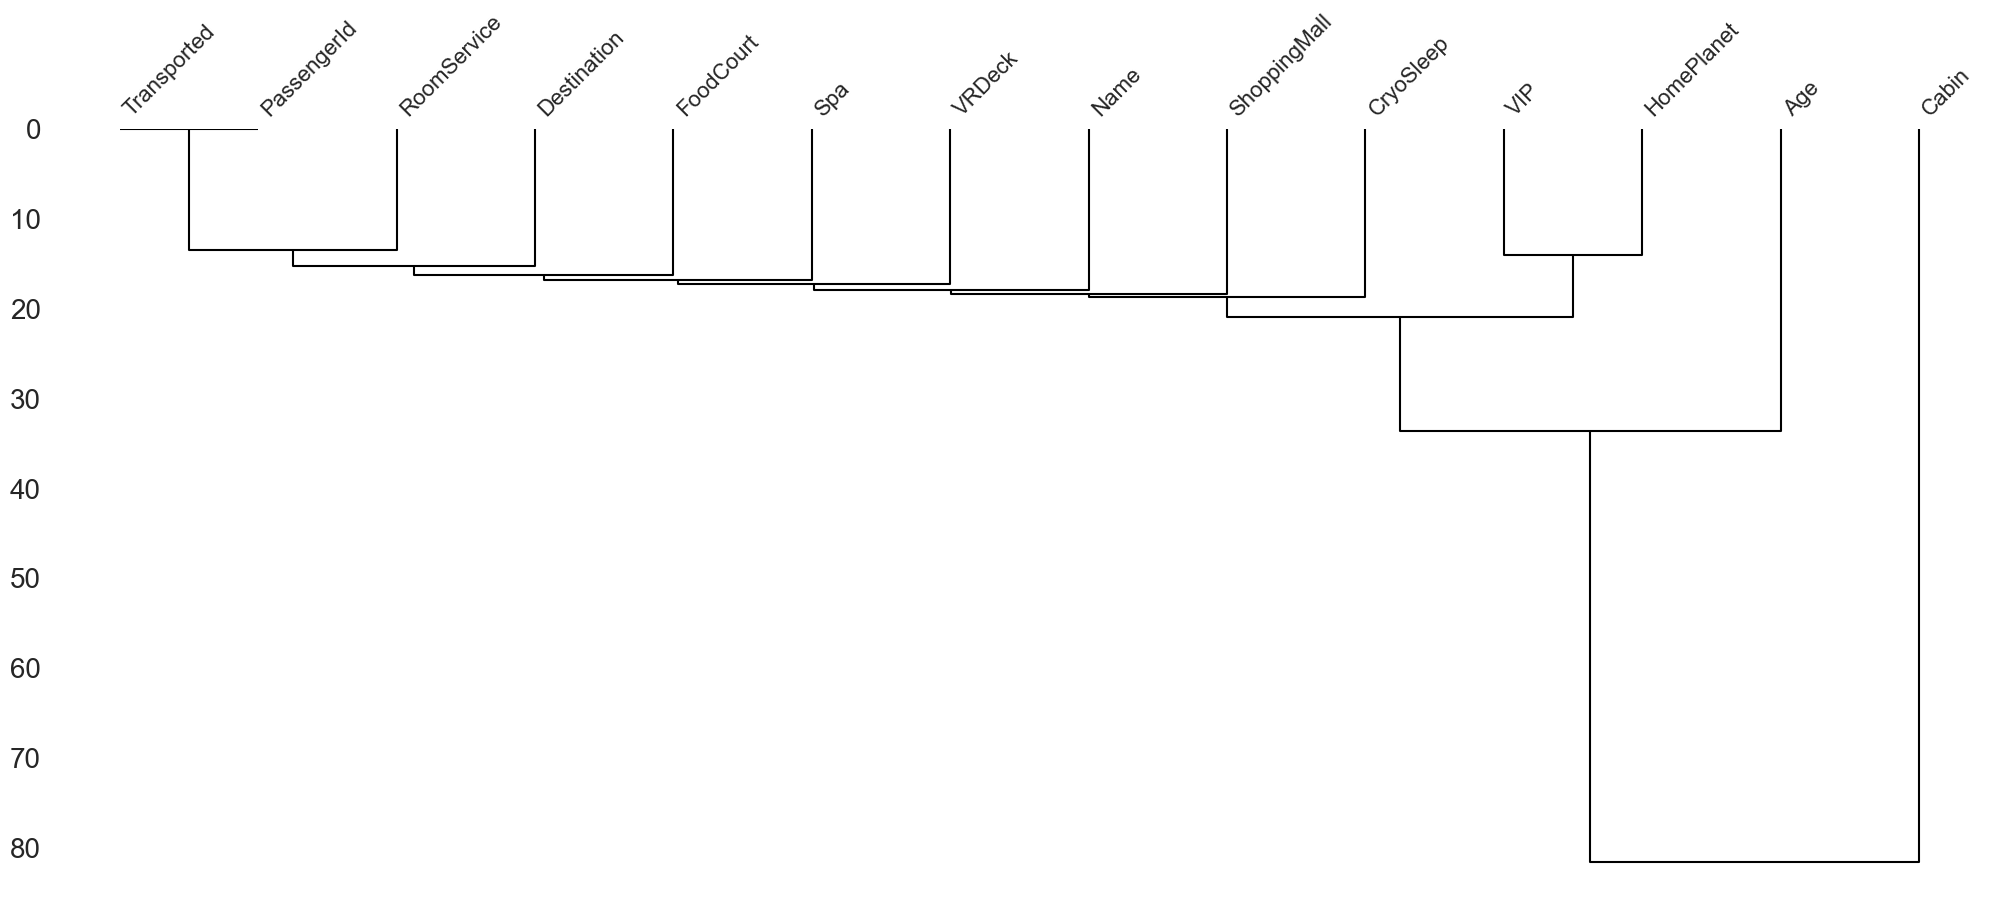

In [245]:
msno.dendrogram(data)
plt.show()

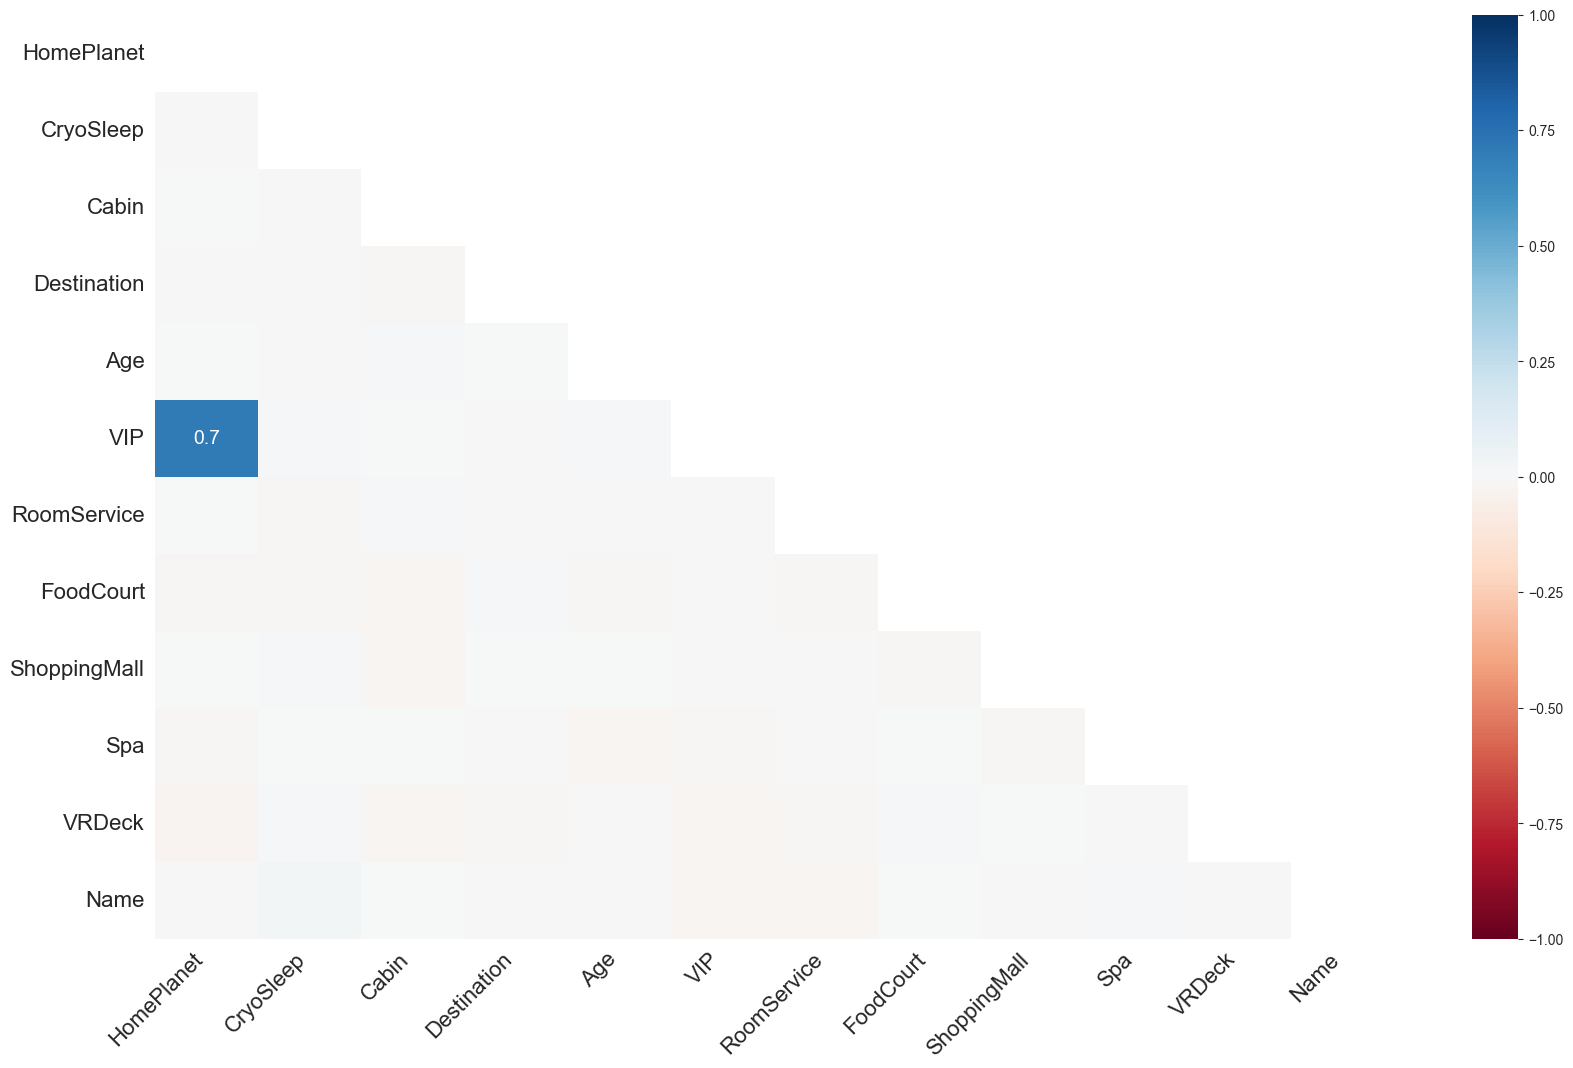

In [246]:
msno.heatmap(data)
plt.show()

# The msno.heatmap(data) function from the missingno library generates a heatmap that visualizes the correlation of missing values between different columns in your dataset. This can help you understand if the presence of missing values in one column is related to the presence of missing values in another column.

# 2.Handling Missing Values
Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [247]:
data.Age.mean()

np.float64(28.798805039615534)

# Dropping rows

In [248]:
data = data.dropna(subset=['RoomService'], axis=0)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


data.dropna(): This function is used to remove missing values.

subset=["RoomService"]: Specifies that the operation should only consider the RoomService column.

axis=0: Indicates that rows with missing values in the RoomService column should be dropped.

Result: The DataFrame data will no longer contain any rows where the RoomService column is NaN (missing).

Original:
PassengerId  RoomService  Age
0            1          100   25
1            2          NaN   30
2            3          200   22

After deletion:
PassengerId  RoomService  Age
0            1          100   25
2            3          200   22


In [249]:
data.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt        181
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

# Now in RoomService , there are no missing values

In [250]:
data = data.dropna(subset=["ShoppingMall"], axis=0)
data.isnull().sum()


PassengerId        0
HomePlanet       380
CryoSleep        207
Cabin           6506
Destination      174
Age              950
VIP              195
RoomService        0
FoodCourt        179
ShoppingMall       0
Spa              178
VRDeck           180
Name             195
Transported        0
dtype: int64

# Dropping columns
Dropping complete columns If a column contains a lot of missing values, say more than 70%, and the feature is not significant for the task at hand, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [251]:
data = data.drop(columns='Cabin')
data.isnull().sum()

PassengerId       0
HomePlanet      380
CryoSleep       207
Destination     174
Age             950
VIP             195
RoomService       0
FoodCourt       179
ShoppingMall      0
Spa             178
VRDeck          180
Name            195
Transported       0
dtype: int64

In [252]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,NaN,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Imputing missing values with a constant, mean, meadian, etc.

SimpleImputer - Replacing missing values with a constant value.


In [253]:
constant_imputer = SimpleImputer(strategy = 'constant', fill_value=0)

# This imputer will replace missing values in a dataset with a constant value, which in this case is 0

The SimpleImputer class from the sklearn.impute module provides several strategies for imputing missing values. Here are the available options for the strategy parameter:
mean: Replaces missing values using the mean along each column.
median: Replaces missing values using the median along each column.
most_frequent: Replaces missing values using the most frequent value along each column.
constant: Replaces missing values with a constant value specified by the fill_value parameter.

In [254]:
data['FoodCourt'] = constant_imputer.fit_transform([data['FoodCourt']])[0] # Impute missing values in the 'FoodCourt' column


fit_transform(): Use this when you need to both compute the statistics and immediately apply them to fill missing values in the same dataset.

Fit: Learns the imputation strategy (in this case, it doesn't need to learn anything since it's a constant value).

Transform: Applies the imputation strategy to the data, replacing missing values with 0.

In [255]:
data.isnull().sum()

PassengerId       0
HomePlanet      380
CryoSleep       207
Destination     174
Age             950
VIP             195
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             178
VRDeck          180
Name            195
Transported       0
dtype: int64

In [256]:
frequent_imputer = SimpleImputer(strategy='most_frequent')

In [257]:
data['HomePlanet'] = data['HomePlanet'].astype(str)
data['HomePlanet'] = frequent_imputer.fit_transform(data['HomePlanet'].values.reshape(1,-1))[0]

data['HomePlanet'] = data['HomePlanet'].astype(str)

This line ensures that all values in the HomePlanet column are treated as strings. This is necessary because the SimpleImputer with the most_frequent strategy works with categorical data.

# HomePlanet is a categorical data - strings - bar plot 

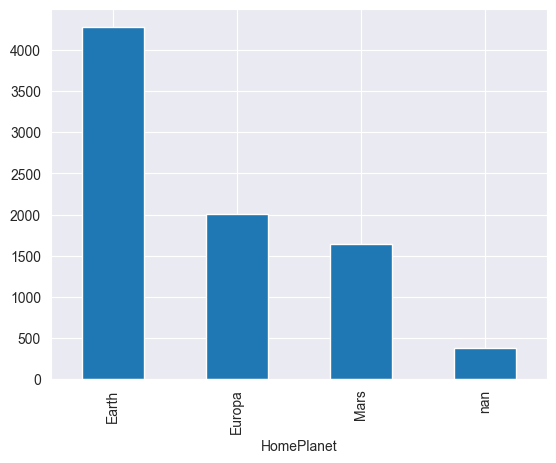

In [258]:
data['HomePlanet'].value_counts().plot.bar()
plt.show()

In [259]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       207
Destination     174
Age             950
VIP             195
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             178
VRDeck          180
Name            195
Transported       0
dtype: int64

# Age is a number - continious - we use histogram

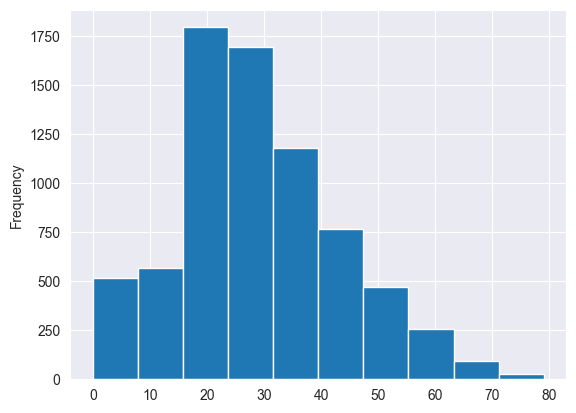

In [260]:
data.Age.plot.hist()
plt.show()

In [261]:
data.Age = data.Age.fillna(data.Age.mean())

data.Age.fillna(data.Age.mean()): The fillna method is called on the Age column, replacing all missing values (NaN) with the mean value calculated in the previous step.

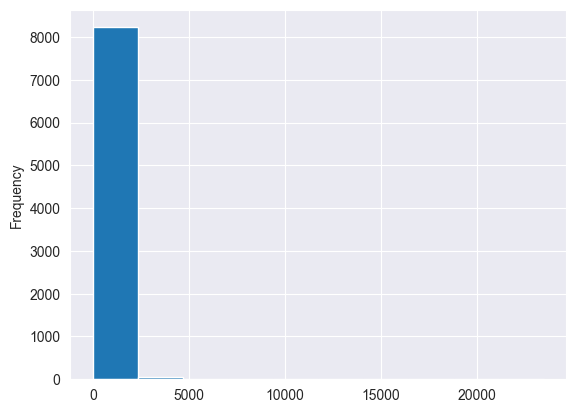

In [262]:
data.ShoppingMall.plot.hist()
plt.show()

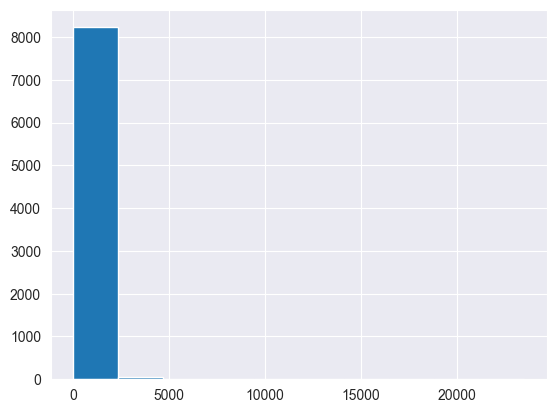

In [263]:
data['ShoppingMall'].hist()
plt.show()

In [264]:
data.ShoppingMall.mean()

np.float64(173.41911410688493)

In [265]:
data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.mean())

In [266]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


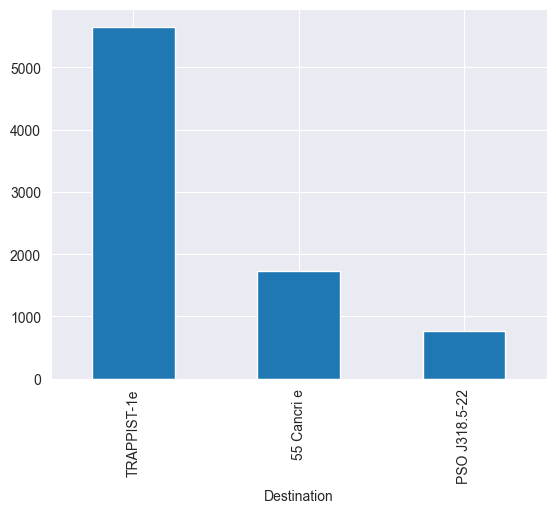

In [267]:
data['Destination'].value_counts().plot.bar()
plt.show()

# KNN - K Nearest Neighbour
The KNNImputer uses a k-nearest neighbors approach to impute missing values, filling them based on the values of the nearest neighbors in the dataset.
How it works: For each missing value, it finds the k nearest neighbors (based on Euclidean distance by default) and imputes the missing value using the mean or median of those neighbors.

In [268]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       207
Destination     174
Age               0
VIP             195
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             178
VRDeck          180
Name            195
Transported       0
dtype: int64

In [269]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


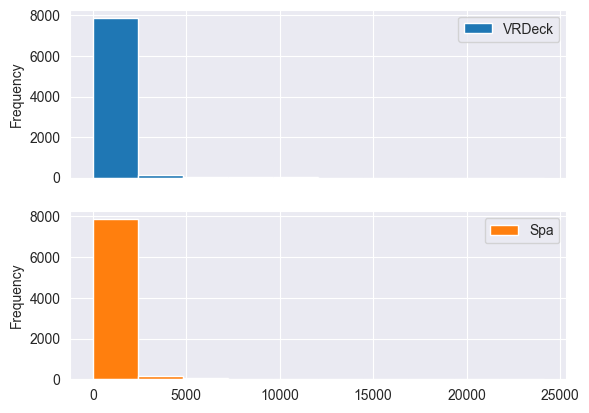

In [270]:
data[['VRDeck', 'Spa']].plot.hist(subplots=True) #posebni histogrami pravi 
plt.show()

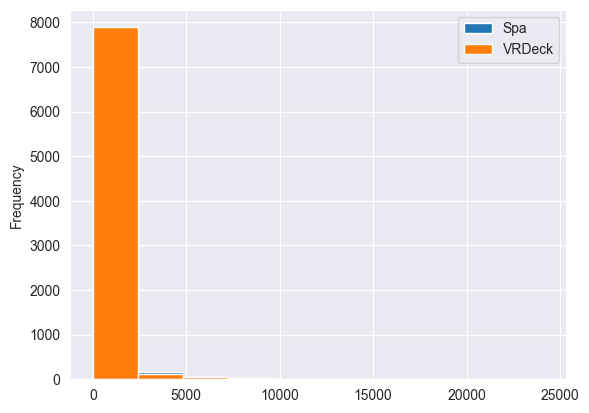

In [271]:
data[['Spa', 'VRDeck']].plot.hist()
plt.show()

In [272]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['VRDeck', 'Spa']])
scaled_data

array([[0.00000000e+00, 0.00000000e+00],
       [1.82322960e-03, 2.45001785e-02],
       [2.03041478e-03, 2.99669761e-01],
       ...,
       [0.00000000e+00, 4.46269190e-05],
       [1.34048813e-01, 1.57533024e-02],
       [4.97244437e-04, 0.00000000e+00]])

In [273]:
knn_imputer = KNNImputer()
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data

array([[0.00000000e+00, 0.00000000e+00],
       [1.82322960e-03, 2.45001785e-02],
       [2.03041478e-03, 2.99669761e-01],
       ...,
       [0.00000000e+00, 4.46269190e-05],
       [1.34048813e-01, 1.57533024e-02],
       [4.97244437e-04, 0.00000000e+00]])

This line creates an instance of the MinMaxScaler. The MinMaxScaler scales each feature to a given range, typically between 0 and 1

fit_transform: This method first fits the scaler to the data (i.e., it computes the minimum and maximum values for each feature) and then transforms the data by scaling it to the specified range (default is 0 to 1).

Scaling data to a range between 0 and 1 using techniques like MinMaxScaler is important for several reasons:  
# Normalization: It ensures that all features contribute equally to the result, preventing features with larger ranges from dominating the model.  
# Improved Convergence: Many machine learning algorithms, especially those that use gradient descent (e.g., neural networks), converge faster when the data is normalized.  
# Distance-Based Algorithms: Algorithms like K-Nearest Neighbors (KNN) and clustering algorithms (e.g., K-Means) rely on distance calculations. Scaling ensures that all features are on the same scale, making the distance calculations meaningful.

In [274]:
imputed_data = scaler.inverse_transform(imputed_data)
imputed_data

array([[0.000e+00, 0.000e+00],
       [4.400e+01, 5.490e+02],
       [4.900e+01, 6.715e+03],
       ...,
       [0.000e+00, 1.000e+00],
       [3.235e+03, 3.530e+02],
       [1.200e+01, 0.000e+00]])

# scaler.inverse_transform(imputed_data): This method reverses the scaling transformation applied by the MinMaxScaler. It takes the scaled data (imputed_data) and converts it back to the original range of the data before scaling.

In [275]:
data[['VRDeck', 'Spa']] = imputed_data


In [276]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       207
Destination     174
Age               0
VIP             195
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            195
Transported       0
dtype: int64

# 

In [277]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


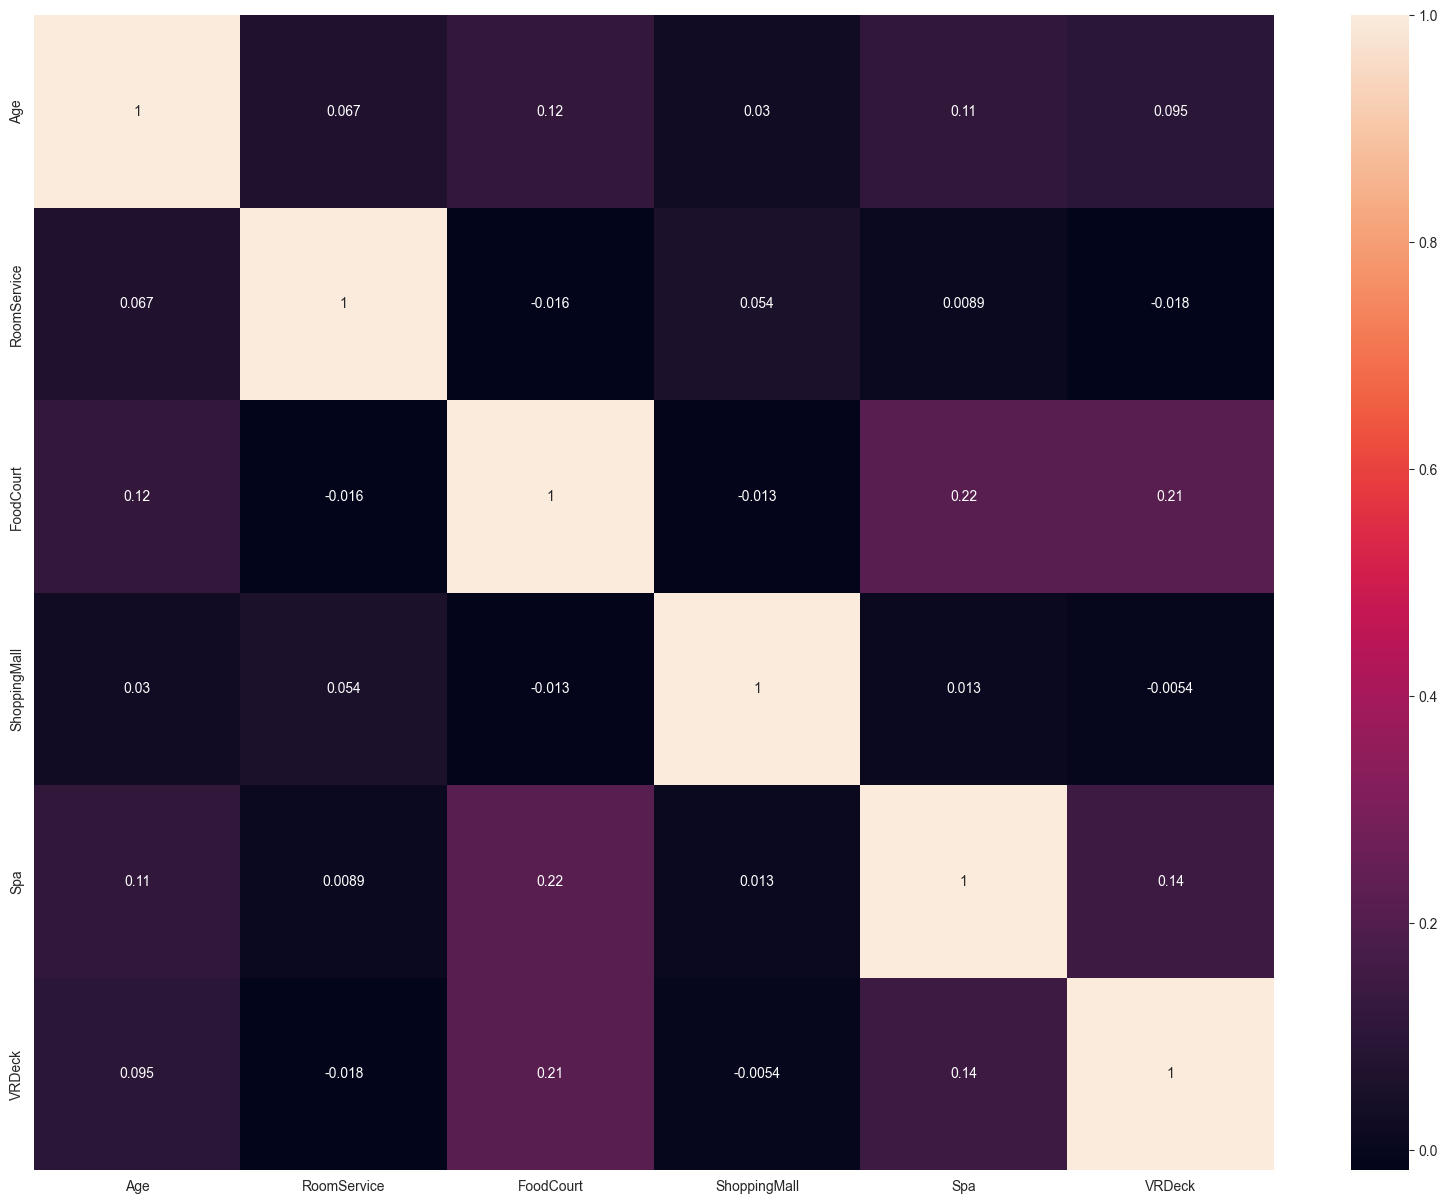

In [278]:
plt.figure(figsize=(20, 15))
sns.heatmap(data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr(), annot=True) # gi zimam decimalnite promenlivi i pravam samo korelacija  
plt.show()

In [279]:
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[['VRDeck', 'FoodCourt', 'Spa']])
data[['VRDeck', 'FoodCourt', 'Spa']] = imputed_values

In [280]:
imputed_values

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [4.400e+01, 9.000e+00, 5.490e+02],
       [4.900e+01, 3.576e+03, 6.715e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00],
       [3.235e+03, 1.049e+03, 3.530e+02],
       [1.200e+01, 4.688e+03, 0.000e+00]])

In [281]:
aq_data = pd.read_csv('air_quality_missing.csv')

In [282]:
aq_data.head(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.1,NaN,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,NaN,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,NaN,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,NaN,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,NaN,63.0


For NO2 we have missing values at the start 

In [283]:
aq_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [284]:
aq_data.tail(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647491,12/31/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.010,0.023,0.4,42.0,34.0
647492,12/31/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.011,0.023,0.4,31.0,24.0
647493,12/31/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.021,0.4,28.0,22.0
647494,12/31/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.018,0.019,0.4,25.0,19.0
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0


In [285]:
aq_data['NO2'] = aq_data['NO2'].bfill() #This method performs a backward fill, which means it fills the missing values (NaNs) in the column by propagating the next valid observation backward.

In [286]:
aq_data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.2,NaN,61.0


In [287]:
aq_data['CO'] = aq_data['CO'].ffill() #forward fill

In [288]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                95
PM2.5               78
dtype: int64

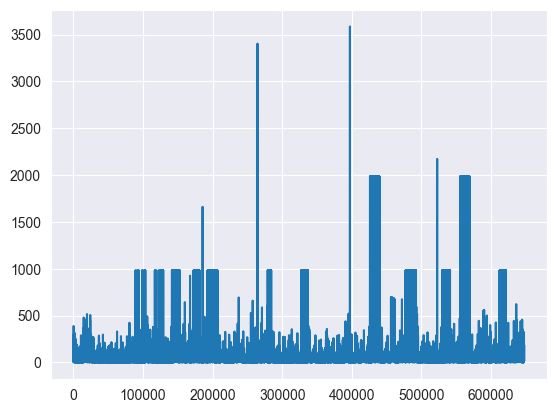

In [289]:
aq_data['PM10'].plot.line()
plt.show()

In [290]:
aq_data['PM10'] = aq_data['PM10'].interpolate(limit_direction='both')

# Interpolating is a method used to estimate missing values within a dataset by using the known values around them. The limit_direction='both' parameter allows the interpolation to fill missing values in both forward and backward directions.

In [291]:
aq_data.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                 0
PM2.5               78
dtype: int64

In [292]:
aq_data

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,73.000000,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,71.000000,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,70.000000,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,72.181818,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.2,74.363636,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,12/31/2019 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.4,23.000000,17.0
647507,12/31/2019 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.000000,19.0
647508,12/31/2019 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.000000,17.0
647509,12/31/2019 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.4,25.000000,18.0


# Label Encoder
The LabelEncoder from sklearn.preprocessing is used to convert categorical labels into numeric form. This is useful for machine learning algorithms that require numerical input.  
In this example, the LabelEncoder converts the categorical labels 'A', 'B', and 'C' into numeric values 0, 1, and 2, respectively.

In [293]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [294]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['HomePlanet'])

In [295]:
data['HomePlanet_Encoded'] = encoded_values # dodava nova kolona so enkodiranite vrednosti od HomePlanet 
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Encoded
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


# One-Hot Encoding

In [296]:
data.Destination.value_counts()

Destination
TRAPPIST-1e      5652
55 Cancri e      1723
PSO J318.5-22     759
Name: count, dtype: int64

In [297]:
one_hot_destination = pd.get_dummies(data.Destination)

# pd.get_dummies(data.Destination): This function converts the Destination column into multiple binary columns, each representing one unique category in the Destination column. Each binary column will have a value of 1 if the original Destination value matches the column name, and 0 otherwise.

In [298]:
data = pd.concat([data, one_hot_destination], axis=1) # spojuva data so novite posebni pod-koloni od get_dummies , axis=1 e deka odi po koloni

In [299]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Encoded,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,False,False,True
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,False,False,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,False,False,True
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,False,False,True
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,True,False,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,False,True,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,False,False,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,True,False,False


In [300]:
data = data.drop(columns=['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'])

In [301]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Encoded
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [302]:
one_hot_destination = pd.get_dummies(data.Destination)

In [303]:
data = pd.concat([data, one_hot_destination], axis=1)

In [304]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Encoded,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,False,False,True
1,0002_01,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,False,False,True
2,0003_01,Europa,False,TRAPPIST-1e,28.853765,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,False,False,True
3,0003_02,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,False,False,True
4,0004_01,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.000000,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,True,False,False
8689,9278_01,Earth,True,PSO J318.5-22,18.000000,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,False,True,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.000000,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,False,False,True
8691,9280_01,Europa,False,55 Cancri e,28.853765,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,True,False,False
